In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Machine Learning\Pandas\\Datasets\\Multi_Ln_Student_Performance.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_19356\181777161.py:1: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv("C:\\Users\\User\\Desktop\\Machine Learning\Pandas\\Datasets\\Multi_Ln_Student_Performance.csv")


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [61]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [97]:
x=df.iloc[:,:-1]
y=df.iloc[:,5]

In [93]:
df["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [99]:
Extra_A=pd.get_dummies(x["Extracurricular Activities"],drop_first=True).astype(int)

In [101]:
x=x.drop("Extracurricular Activities",axis=1)

In [192]:
x=pd.concat([x,Extra_A],axis=1)

In [105]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [188]:
y_pred=lr.predict(x_test)

In [125]:
from sklearn.metrics import r2_score

In [190]:
score=r2_score(y_test,y_pred)
score*100

98.89832909573146

In [113]:
lr.score(x_test,y_test)*100

98.89832909573146

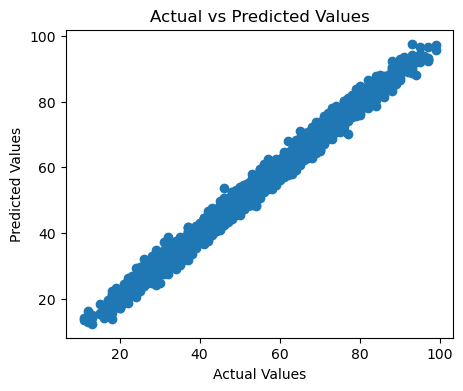

In [216]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

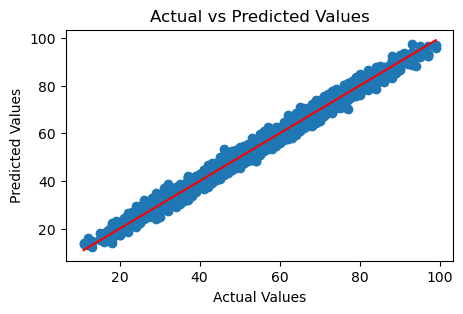

In [214]:
# Predicted values
y_pred = lr.predict(x_test)
# Scatter plot
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")  # Perfect prediction line
plt.show()

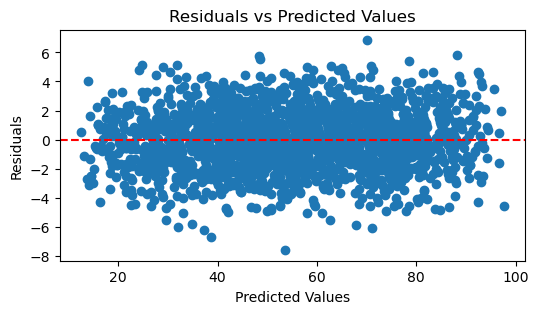

In [208]:
# Residuals
residuals = y_test - y_pred
# Scatter plot
plt.figure(figsize=(6,3))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

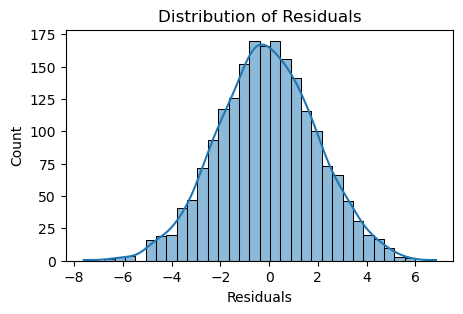

In [210]:
# Histogram of residuals
plt.figure(figsize=(5,3))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()
